## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

### Import Dependencies

In [12]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv('../../../../../../classkeys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["T","NKE","XOM"]

# Get 5 year's worth of historical price data
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

NKE                                      T  \
                            open    high    low  close    volume   open   
time                                                                      
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201  39.30   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816  39.47   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946  38.95   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280  39.24   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392  39.09   

                                                                XOM         \
                              high    low    close    volume   open   high   
time                                                                         
2016-05-12 00:00:00-04:00  39.6665  39.20  39.5600  15796926  89.80  89.93   
2016-05-13 00:00:00-04:00  39.5200  39.11  39.1463  13723184  89.28  89.66   
2016-05-16 00:00:00-04:00  39.2988  38.90  39.2800  12318580  89.20  89.67   
2016-05-17 00:00:00-04:00  39.3300  39.00  39.1000  17858661  89.27  89.91   
2016-05-18 00:00:00-04:00  39.1500  38.27  38.4400  22339324  89.80  90.00   

                                                    
                             low    close   volume  
time                                                
2016-05-12 00:00:00-04:00  89.15  89.6799  8639479  
2016-05-13 00:00:00-04:00  88.51  88.6500  7369897  
2016-05-16 00:00:00-04:00  89.00  89.5600  6411291  
2016-05-17 00:00:00-04:00  89.16  89.5200  7204222  
2016-05-18 00:00:00-04:00  88.65  89.3300  7582643

### Simulate five year portfolio growth with evenly-distributed stock investments

In [20]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1/3,1/3,1/3],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201          NaN   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816    -0.012069   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946    -0.002792   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280    -0.000700   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392    -0.017338   

                               T                                     \
                            open     high    low    close    volume   
time                                                                  
2016-05-12 00:00:00-04:00  39.30  39.6665  39.20  39.5600  15796926   
2016-05-13 00:00:00-04:00  39.47  39.5200  39.11  39.1463  13723184   
2016-05-16 00:00:00-04:00  38.95  39.2988  38.90  39.2800  12318580   
2016-05-17 00:00:00-04:00  39.24  39.3300  39.00  39.1000  17858661   
2016-05-18 00:00:00-04:00  39.09  39.1500  38.27  38.4400  22339324   

                                          XOM                                  \
                          daily_return   open   high    low    close   volume   
time                                                                            
2016-05-12 00:00:00-04:00          NaN  89.80  89.93  89.15  89.6799  8639479   
2016-05-13 00:00:00-04:00    -0.010458  89.28  89.66  88.51  88.6500  7369897   
2016-05-16 00:00:00-04:00     0.003415  89.20  89.67  89.00  89.5600  6411291   
2016-05-17 00:00:00-04:00    -0.004582  89.27  89.91  89.16  89.5200  7204222   
2016-05-18 00:00:00-04:00    -0.016880  89.80  90.00  88.65  89.3300  7582643   

                                        
                          daily_return  
time                                    
2016-05-12 00:00:00-04:00          NaN  
2016-05-13 00:00:00-04:00    -0.011484  
2016-05-16 00:00:00-04:00     0.010265  
2016-05-17 00:00:00-04:00    -0.000447  
2016-05-18 00:00:00-04:00    -0.002122

In [21]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jeffr\desktop\github\fintech\Class\05-APIs\Day 3\Activities\04-Stu_Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002173,0.995768,0.989290,0.989333,0.987256,1.000279,0.999251,0.985070,0.999344,0.996690,...,1.014710,0.999988,1.001790,0.999569,1.001531,0.989506,1.004205,0.994395,0.993764,0.984195
2,1.005975,0.991397,1.006171,0.990227,0.973877,1.012115,1.002732,0.987179,1.001096,1.014740,...,1.020287,0.982193,1.013409,0.991353,1.003378,0.997525,1.002874,0.987796,0.995253,0.988019
3,1.007819,0.975937,1.004418,1.002784,0.965865,1.015020,1.000580,1.002230,1.002149,1.006610,...,1.011109,0.985522,0.999544,0.978483,1.009221,0.998983,1.018021,1.008858,0.988683,1.009658
4,1.006988,0.980962,1.013658,1.004602,0.967057,1.005677,1.015958,1.011825,1.007085,1.017958,...,1.016229,0.992152,0.986710,0.990668,1.004911,0.987012,1.015910,0.997594,1.005207,0.992041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.655289,0.747635,0.786247,0.906771,1.071074,0.415283,0.470863,0.902070,0.805646,0.595170,...,1.026503,0.909958,0.603967,0.765150,0.821000,1.091387,0.606045,0.448892,1.351445,0.484004
1257,0.661783,0.749785,0.792004,0.906163,1.071123,0.417419,0.474477,0.875853,0.805053,0.579331,...,1.015511,0.929348,0.600307,0.749154,0.828207,1.088290,0.605332,0.441072,1.367651,0.484945
1258,0.667445,0.749402,0.787637,0.903774,1.067146,0.422673,0.473548,0.877687,0.790867,0.574289,...,1.020999,0.926583,0.601496,0.753283,0.819504,1.098735,0.600453,0.444625,1.362329,0.489744
1259,0.671454,0.739207,0.804736,0.897858,1.098482,0.420266,0.470922,0.893591,0.792401,0.564235,...,1.015676,0.923988,0.598488,0.756236,0.816512,1.110989,0.603371,0.449532,1.359716,0.493499


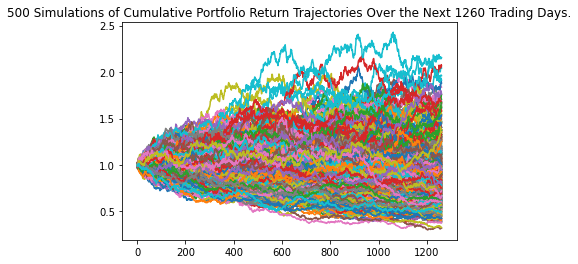

In [29]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches='tight')

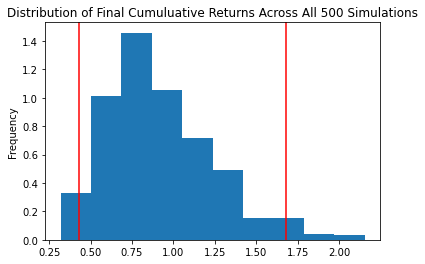

In [23]:
# Plot probability distribution and confidence intervals
dist_plot =  MC_even_dist.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              0.916992
std               0.323422
min               0.318660
25%               0.689565
50%               0.854895
75%               1.112005
max               2.155756
95% CI Lower      0.433054
95% CI Upper      1.677316
Name: 1260, dtype: float64


In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments stocks
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*15000,2)
ci_upper = round(even_tbl[9]*15000,2)

# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6495.81 and $25159.75


### Simulate five year portfolio growth with 60% AT&T stock

In [26]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
# YOUR CODE HERE!
MC_att = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.20,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_att.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201          NaN   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816    -0.012069   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946    -0.002792   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280    -0.000700   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392    -0.017338   

                               T                                     \
                            open     high    low    close    volume   
time                                                                  
2016-05-12 00:00:00-04:00  39.30  39.6665  39.20  39.5600  15796926   
2016-05-13 00:00:00-04:00  39.47  39.5200  39.11  39.1463  13723184   
2016-05-16 00:00:00-04:00  38.95  39.2988  38.90  39.2800  12318580   
2016-05-17 00:00:00-04:00  39.24  39.3300  39.00  39.1000  17858661   
2016-05-18 00:00:00-04:00  39.09  39.1500  38.27  38.4400  22339324   

                                          XOM                                  \
                          daily_return   open   high    low    close   volume   
time                                                                            
2016-05-12 00:00:00-04:00          NaN  89.80  89.93  89.15  89.6799  8639479   
2016-05-13 00:00:00-04:00    -0.010458  89.28  89.66  88.51  88.6500  7369897   
2016-05-16 00:00:00-04:00     0.003415  89.20  89.67  89.00  89.5600  6411291   
2016-05-17 00:00:00-04:00    -0.004582  89.27  89.91  89.16  89.5200  7204222   
2016-05-18 00:00:00-04:00    -0.016880  89.80  90.00  88.65  89.3300  7582643   

                                        
                          daily_return  
time                                    
2016-05-12 00:00:00-04:00          NaN  
2016-05-13 00:00:00-04:00    -0.011484  
2016-05-16 00:00:00-04:00     0.010265  
2016-05-17 00:00:00-04:00    -0.000447  
2016-05-18 00:00:00-04:00    -0.002122

In [27]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
# YOUR CODE HERE!
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jeffr\desktop\github\fintech\Class\05-APIs\Day 3\Activities\04-Stu_Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987204,0.970890,1.016564,0.999482,1.012451,0.996475,1.022982,0.999725,0.999679,0.983982,...,1.006199,1.016722,0.997003,1.000342,1.026184,0.991198,1.015833,0.990109,1.016186,1.000980
2,0.990845,0.970947,1.026954,0.995139,1.016666,0.994346,1.001991,1.010045,0.983061,0.994601,...,1.015592,1.014548,0.974040,0.994970,1.031600,0.983305,1.029101,0.991821,1.032968,1.021413
3,0.990748,0.973987,1.044867,1.005164,1.033326,0.987528,0.990695,1.028098,0.981159,1.012403,...,1.026964,1.019869,0.973143,0.996451,1.027985,0.990461,1.026680,1.000069,1.010511,1.032726
4,0.989968,0.974932,1.050272,0.978228,1.055512,0.990376,0.996224,1.033001,0.977420,1.015743,...,1.024374,1.016894,0.958053,0.990341,1.027485,0.975824,1.036950,1.001693,1.022501,1.020823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.601320,0.458750,1.137830,0.881120,1.741359,1.199102,0.772584,0.663247,0.773562,1.147806,...,1.114208,0.760893,0.617419,1.115007,0.898025,2.074140,1.900695,1.922183,0.920988,0.893942
1257,1.587904,0.453845,1.122232,0.874026,1.751309,1.197328,0.768280,0.657363,0.769215,1.163741,...,1.114521,0.756665,0.609377,1.094754,0.902880,2.075181,1.902793,1.924226,0.918411,0.905397
1258,1.595636,0.449465,1.125049,0.886586,1.761053,1.166445,0.773065,0.661564,0.782785,1.180126,...,1.101495,0.758132,0.611077,1.078040,0.896659,2.071850,1.922327,1.890615,0.914131,0.893384
1259,1.603090,0.447515,1.111379,0.890731,1.778666,1.193725,0.785635,0.664878,0.792978,1.170127,...,1.106677,0.770114,0.603076,1.072917,0.883332,2.047315,1.876930,1.860290,0.915555,0.892925


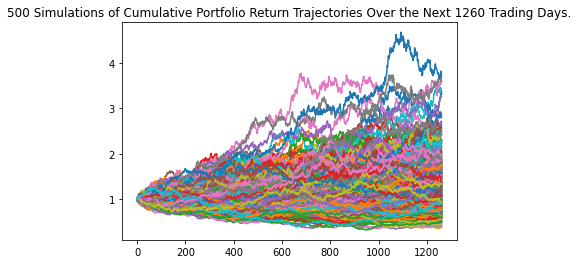

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
att_line_plot = MC_att.plot_simulation()

# Save the plot for future usage
att_line_plot.get_figure().savefig("MC_fiveyear_att_sim_plot.png", bbox_inches="tight")

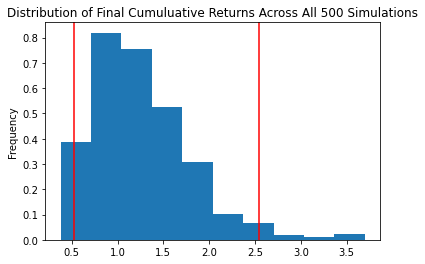

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
att_dist_plot =  MC_att.plot_distribution()

# Save the plot for future usage
att_dist_plot.get_figure().savefig('MC_fiveyear_att_dist_plot.png',bbox_inches='tight')

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           500.000000
mean              1.263135
std               0.544775
min               0.378311
25%               0.848317
50%               1.178345
75%               1.570570
max               3.697611
95% CI Lower      0.529567
95% CI Upper      2.547999
Name: 1260, dtype: float64


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
# YOUR CODE HERE!
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $7943.5 and $38219.98


### Simulate five year portfolio growth with 60% Nike stock

In [33]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
# YOUR CODE HERE!
MC_nike = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.60,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_nike.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201          NaN   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816    -0.012069   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946    -0.002792   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280    -0.000700   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392    -0.017338   

                               T                                     \
                            open     high    low    close    volume   
time                                                                  
2016-05-12 00:00:00-04:00  39.30  39.6665  39.20  39.5600  15796926   
2016-05-13 00:00:00-04:00  39.47  39.5200  39.11  39.1463  13723184   
2016-05-16 00:00:00-04:00  38.95  39.2988  38.90  39.2800  12318580   
2016-05-17 00:00:00-04:00  39.24  39.3300  39.00  39.1000  17858661   
2016-05-18 00:00:00-04:00  39.09  39.1500  38.27  38.4400  22339324   

                                          XOM                                  \
                          daily_return   open   high    low    close   volume   
time                                                                            
2016-05-12 00:00:00-04:00          NaN  89.80  89.93  89.15  89.6799  8639479   
2016-05-13 00:00:00-04:00    -0.010458  89.28  89.66  88.51  88.6500  7369897   
2016-05-16 00:00:00-04:00     0.003415  89.20  89.67  89.00  89.5600  6411291   
2016-05-17 00:00:00-04:00    -0.004582  89.27  89.91  89.16  89.5200  7204222   
2016-05-18 00:00:00-04:00    -0.016880  89.80  90.00  88.65  89.3300  7582643   

                                        
                          daily_return  
time                                    
2016-05-12 00:00:00-04:00          NaN  
2016-05-13 00:00:00-04:00    -0.011484  
2016-05-16 00:00:00-04:00     0.010265  
2016-05-17 00:00:00-04:00    -0.000447  
2016-05-18 00:00:00-04:00    -0.002122

In [34]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
# YOUR CODE HERE!
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jeffr\desktop\github\fintech\Class\05-APIs\Day 3\Activities\04-Stu_Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020538,1.001100,0.993138,0.984700,1.001888,0.979507,1.006620,0.994719,1.011471,1.001788,...,0.997772,0.999681,0.972813,0.980536,1.000976,1.003848,1.004229,0.995160,1.010546,0.990116
2,1.029906,0.994623,0.997300,0.984785,1.002847,0.963472,1.001958,0.982116,1.000275,1.001292,...,0.989547,1.007348,0.969317,0.969681,1.001137,0.988522,1.032438,1.002870,1.001434,0.982349
3,1.012280,0.999876,1.002006,0.987380,1.011229,0.964129,0.994196,0.970059,1.000249,1.014978,...,0.991736,1.006422,0.980063,0.976018,1.003703,0.982663,1.028784,1.002470,0.986986,1.001951
4,1.007890,0.998862,1.011736,0.980310,1.007228,0.959955,0.988445,0.952558,0.992418,1.019625,...,1.003742,0.995949,0.986266,0.992642,0.982578,0.974244,1.048169,1.001270,0.993936,0.993784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.397636,0.867259,0.667490,0.969263,1.443518,0.946527,0.493623,0.561530,0.708545,0.967661,...,0.684617,0.632438,0.892734,0.595874,1.151559,1.094789,0.629843,0.825328,1.413074,1.137571
1257,0.396216,0.873083,0.658269,0.974294,1.448545,0.944992,0.501061,0.565529,0.703192,0.984704,...,0.683157,0.639572,0.893981,0.593592,1.158865,1.096937,0.628414,0.820777,1.430312,1.143301
1258,0.402474,0.881326,0.656420,0.960591,1.453622,0.946532,0.501339,0.560330,0.700123,0.971781,...,0.681805,0.635831,0.885320,0.593780,1.141955,1.090646,0.625172,0.817286,1.452769,1.140219
1259,0.408318,0.874401,0.663434,0.962062,1.471248,0.930291,0.487743,0.555255,0.692775,0.977113,...,0.686936,0.623668,0.907081,0.603551,1.146797,1.095711,0.618994,0.803859,1.451785,1.141496


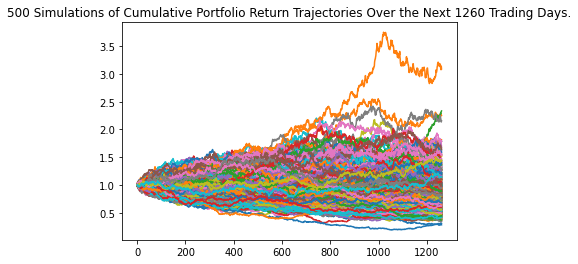

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
nike_line_plot = MC_nike.plot_simulation()

# Save the plot for future usage
nike_line_plot.get_figure().savefig("MC_fiveyear_nike_sim_plot.png", bbox_inches="tight")

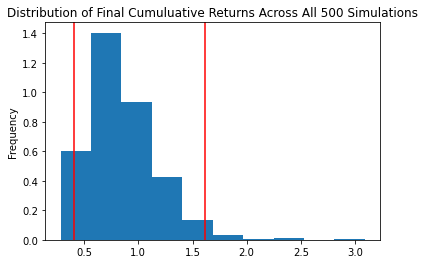

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
nike_dist_plot =  MC_nike.plot_distribution()

# Save the plot for future usage
nike_dist_plot.get_figure().savefig('MC_fiveyear_nike_dist_plot.png',bbox_inches='tight')

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
nike_tbl = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_tbl)

count           500.000000
mean              0.854129
std               0.329342
min               0.281873
25%               0.629500
50%               0.804097
75%               1.011537
max               3.090207
95% CI Lower      0.410206
95% CI Upper      1.615954
Name: 1260, dtype: float64


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
# YOUR CODE HERE!
nike_ci_lower = round(nike_tbl[8]*15000,2)
nike_ci_upper = round(nike_tbl[9]*15000,2)

# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6153.09 and $24239.31


### Simulate five year portfolio growth with 60% Exxon stock

In [39]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
# YOUR CODE HERE!
MC_exxon = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.20,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_exxon.portfolio_data

NKE                                   \
                            open    high     low  close    volume   
time                                                                
2016-05-12 00:00:00-04:00  57.52  58.340  57.310  58.00   7123201   
2016-05-13 00:00:00-04:00  57.74  58.120  57.280  57.30   6459816   
2016-05-16 00:00:00-04:00  57.27  57.530  56.630  57.14   7121946   
2016-05-17 00:00:00-04:00  57.15  57.375  56.650  57.10   6292280   
2016-05-18 00:00:00-04:00  56.76  56.870  55.670  56.11  10106392   
...                          ...     ...     ...    ...       ...   
2020-04-27 00:00:00-04:00  88.38  89.870  87.310  89.33   6204274   
2020-04-28 00:00:00-04:00  90.55  90.710  88.630  88.81   4483633   
2020-04-29 00:00:00-04:00  90.00  91.390  87.830  88.04   7944474   
2020-04-30 00:00:00-04:00  87.00  88.000  86.505  87.18   6528373   
2020-05-01 00:00:00-04:00  85.67  86.105  84.810  85.54   5357539   

                                            T                            \
                          daily_return   open     high     low    close   
time                                                                      
2016-05-12 00:00:00-04:00          NaN  39.30  39.6665  39.200  39.5600   
2016-05-13 00:00:00-04:00    -0.012069  39.47  39.5200  39.110  39.1463   
2016-05-16 00:00:00-04:00    -0.002792  38.95  39.2988  38.900  39.2800   
2016-05-17 00:00:00-04:00    -0.000700  39.24  39.3300  39.000  39.1000   
2016-05-18 00:00:00-04:00    -0.017338  39.09  39.1500  38.270  38.4400   
...                                ...    ...      ...     ...      ...   
2020-04-27 00:00:00-04:00     0.010635  29.99  30.6800  29.740  30.5400   
2020-04-28 00:00:00-04:00    -0.005821  31.00  31.1200  30.615  30.6500   
2020-04-29 00:00:00-04:00    -0.008670  31.13  31.8700  31.070  31.4400   
2020-04-30 00:00:00-04:00    -0.009768  31.00  31.0500  30.280  30.4500   
2020-05-01 00:00:00-04:00    -0.018812  30.77  30.7900  29.750  29.9000   

                                                    XOM                \
                             volume daily_return   open   high    low   
time                                                                    
2016-05-12 00:00:00-04:00  15796926          NaN  89.80  89.93  89.15   
2016-05-13 00:00:00-04:00  13723184    -0.010458  89.28  89.66  88.51   
2016-05-16 00:00:00-04:00  12318580     0.003415  89.20  89.67  89.00   
2016-05-17 00:00:00-04:00  17858661    -0.004582  89.27  89.91  89.16   
2016-05-18 00:00:00-04:00  22339324    -0.016880  89.80  90.00  88.65   
...                             ...          ...    ...    ...    ...   
2020-04-27 00:00:00-04:00  58376488     0.027937  43.59  44.32  42.23   
2020-04-28 00:00:00-04:00  55107142     0.003602  44.37  45.39  44.11   
2020-04-29 00:00:00-04:00  57547301     0.025775  46.26  47.60  46.16   
2020-04-30 00:00:00-04:00  63467447    -0.031489  47.68  47.68  45.77   
2020-05-01 00:00:00-04:00  69100348    -0.018062  45.63  46.39  43.00   

                                                           
                             close    volume daily_return  
time                                                       
2016-05-12 00:00:00-04:00  89.6799   8639479          NaN  
2016-05-13 00:00:00-04:00  88.6500   7369897    -0.011484  
2016-05-16 00:00:00-04:00  89.5600   6411291     0.010265  
2016-05-17 00:00:00-04:00  89.5200   7204222    -0.000447  
2016-05-18 00:00:00-04:00  89.3300   7582643    -0.002122  
...                            ...       ...          ...  
2020-04-27 00:00:00-04:00  43.9200  26955553     0.004115  
2020-04-28 00:00:00-04:00  44.9800  24393001     0.024135  
2020-04-29 00:00:00-04:00  47.4800  26882843     0.055580  
2020-04-30 00:00:00-04:00  46.4000  28454300    -0.022746  
2020-05-01 00:00:00-04:00  43.1700  32688912    -0.069612  

[1000 rows x 18 columns]

In [40]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
# YOUR CODE HERE!
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jeffr\desktop\github\fintech\Class\05-APIs\Day 3\Activities\04-Stu_Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982824,1.017079,1.013005,0.982323,0.996929,0.991315,1.002081,0.985588,1.006049,1.006179,...,0.984461,1.004052,0.999795,1.005280,1.005169,0.997256,1.004019,0.997395,1.016336,1.002694
2,0.979171,1.004634,1.005140,0.990026,0.998948,0.973198,1.014612,0.976031,1.016482,1.001810,...,0.978780,0.997111,0.997060,0.990787,1.008040,0.960367,1.021526,0.991413,1.030065,1.016844
3,0.961772,0.996480,1.007938,0.995603,0.990966,0.976169,1.022583,0.978302,1.017847,0.998498,...,0.962461,1.009423,0.989613,0.975068,1.021467,0.955677,1.019869,0.983730,1.041371,1.008368
4,0.963827,0.987529,1.008982,1.013148,1.001586,0.975947,1.009527,0.986778,1.009403,0.978171,...,0.957999,1.005660,0.990924,0.971597,1.021882,0.949964,1.030723,0.972335,1.054306,1.002935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.750796,0.345394,0.546761,0.612643,0.461787,0.769152,0.601637,0.555119,0.748956,0.370435,...,0.813544,0.752030,0.644929,1.336641,0.787683,0.942885,0.363169,0.655198,0.469876,1.207694
1257,0.748367,0.353087,0.540781,0.615564,0.466764,0.770521,0.599925,0.557573,0.738064,0.372936,...,0.801373,0.747622,0.650054,1.337615,0.786630,0.943037,0.361688,0.662968,0.465256,1.195707
1258,0.762751,0.351539,0.544227,0.613664,0.469288,0.776631,0.600215,0.553700,0.739400,0.371170,...,0.796810,0.748665,0.642018,1.335403,0.781833,0.944849,0.355119,0.667476,0.463018,1.199414
1259,0.769234,0.347650,0.550223,0.615566,0.467716,0.800527,0.604225,0.543338,0.733605,0.370830,...,0.798996,0.745522,0.638313,1.334613,0.783305,0.935664,0.356458,0.665631,0.455236,1.197256


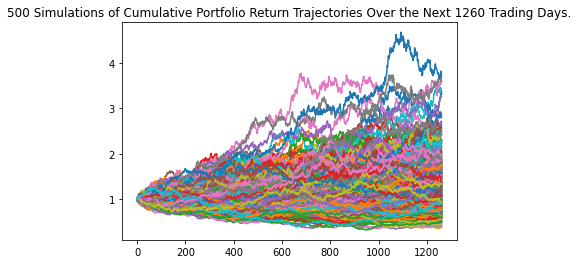

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
exxon_line_plot = MC_att.plot_simulation()

# Save the plot for future usage
exxon_line_plot.get_figure().savefig("MC_fiveyear_exxon_sim_plot.png", bbox_inches="tight")

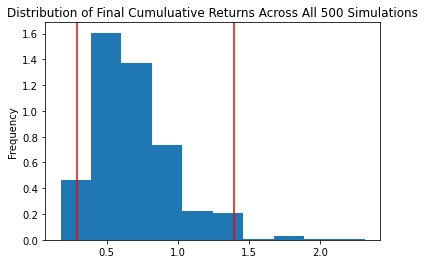

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
exxon_dist_plot =  MC_exxon.plot_distribution()

# Save the plot for future usage
exxon_dist_plot.get_figure().savefig('MC_fiveyear_exxon_dist_plot.png',bbox_inches='tight')

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
exxon_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
print(exxon_tbl)

count           500.000000
mean              1.263135
std               0.544775
min               0.378311
25%               0.848317
50%               1.178345
75%               1.570570
max               3.697611
95% CI Lower      0.529567
95% CI Upper      2.547999
Name: 1260, dtype: float64


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
# YOUR CODE HERE!
exxon_ci_lower = round(exxon_tbl[8]*15000,2)
exxon_ci_upper = round(exxon_tbl[9]*15000,2)

# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $7943.5 and $38219.98


### Summarize findings across all 4 simulations

YOUR ANSWER HERE!